In [3]:
import numpy as np
import pandas as pd

# ЗАГРУЗКА ДАННЫХ

In [4]:
path_1 = 'data/250218.csv'
path_2 = 'data/250219.csv'

data_1 = pd.read_csv(path_1, delimiter=';')
data_2 = pd.read_csv(path_2, delimiter=';')

# data_1 = data_1[data_1['Timestamp'] != 'Timestamp']

In [5]:
print('data_1 stops:', len(data_1[data_1['Timestamp'] == 'Timestamp']))
print('data_2 stops:', len(data_2[data_2['Timestamp'] == 'Timestamp']))

data_1 stops: 16
data_2 stops: 13


In [6]:
data_1.describe()

,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,SO Angle 7 2,SO Angle 7 3,SO Angle 8 1,SO Angle 8 2,SO Angle 8 3,Work time PUD,Work time CPU,Automatic flag,Automatic regime,Automatic step
count,4022,4023,4023,4023,4023,4023,4023,4023,4023,4023,...,4023,4023,4023,4023,4023,4023,4023,4023,4023,4023
unique,4007,5,2,2,23,8,10,11,10,9,...,2,2,2,2,2,3,2,2,2,2
top,Timestamp,06,0000000000000000,0000000000000000,0000000000000000,0000000000000011,"100,000 %","100,000 %","100,000 %","100,000 %",...,0000,0000,0000,0000,0000,00013,00000,00,00,00
freq,16,2499,4006,4006,3537,3182,1059,1228,1229,1850,...,4006,4006,4006,4006,4006,2054,4006,4006,4006,4006


In [7]:
data_2.describe()

,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,SO Angle 7 2,SO Angle 7 3,SO Angle 8 1,SO Angle 8 2,SO Angle 8 3,Work time PUD,Work time CPU,Automatic flag,Automatic regime,Automatic step
count,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050,...,9050,9050,9050,9050,9050,9050,9050,9050,9050,9050
unique,9038,6,2,2,24,11,11,10,11,10,...,2,2,2,2,2,3,2,2,2,2
top,Timestamp,06,0000000000000000,0000000000000000,0000000000000000,0000000000000000,"100,000 %","100,000 %","100,000 %","100,000 %",...,0000,0000,0000,0000,0000,00013,00000,00,00,00
freq,13,4401,9037,9037,8674,3708,2479,2877,2771,4421,...,9037,9037,9037,9037,9037,4879,9037,9037,9037,9037


In [8]:
command_vector_0_masks = {
    "R1_1": 0x1,
    "R1_2": 0x2,
    "R2_1": 0x4,
    "R2_2": 0x8,
    "R3_1": 0x10,
    "R3_2": 0x20,
    "R4_1": 0x40,
    "R4_2": 0x80,
    "R5_1": 0x100,
    "R5_2": 0x200,
    "R6_1": 0x400,
    "R6_2": 0x800,
    "R7_1": 0x1000,
    "R7_2": 0x2000,
    "R8_1": 0x4000,
    "R8_2": 0x8000,
    "R9_1": 0x10000,
    "R9_2": 0x20000,
    "R10_1": 0x40000,
    "R10_2": 0x80000,
    "R11_1": 0x100000,
    "R11_2": 0x200000,
    "R12_1": 0x400000,
    "R12_2": 0x800000,
    "R13_1": 0x1000000,
    "R13_2": 0x2000000,
    "R14_1": 0x4000000,
    "R14_2": 0x8000000,
    "R15_1": 0x10000000,
    "R15_2": 0x20000000,
    "R16_1": 0x40000000,
    "R16_2": 0x80000000,
    "R17_1": 0x100000000,
    "R17_2": 0x200000000,
    "R18_1": 0x400000000,
    "R18_2": 0x800000000,
    "R19_1": 0x1000000000,
    "R19_2": 0x2000000000,
    "R20_1": 0x4000000000,
    "R20_2": 0x8000000000,
    "R21_1": 0x10000000000,
    "R21_2": 0x20000000000,
    "R22_1": 0x40000000000,
    "R22_2": 0x80000000000,
    "R23_1": 0x100000000000,
    "R23_2": 0x200000000000,
    "R24_1": 0x400000000000,
    "R24_2": 0x800000000000,
    "R25_1": 0x1000000000000,
    "R25_2": 0x2000000000000,
    "R26_1": 0x4000000000000,
    "R26_2": 0x8000000000000,
    "R27_1": 0x10000000000000,
    "R27_2": 0x20000000000000,
    "R28_1": 0x40000000000000,
    "R28_2": 0x80000000000000,
    "R29_1": 0x100000000000000,
    "R29_2": 0x200000000000000,
    "R30_1": 0x400000000000000,
    "R30_2": 0x800000000000000,
    "R31_1": 0x1000000000000000,
    "R31_2": 0x2000000000000000,
    "R32_1": 0x4000000000000000,
    "R32_2": 0x8000000000000000
}
len(command_vector_0_masks)

64

In [9]:
def decode_command_vector(hex_str):
    value = int(hex_str, 16)
    active_commands = []
    for name, mask in command_vector_0_masks.items():
        if value & mask:
            active_commands.append(name)
    return active_commands, [hex(command_vector_0_masks[i]) for i in active_commands]

In [10]:
unique_comand2 = data_2[data_2['Comand_vector #0'] != 'Comand_vector #0']['Comand_vector #0'].unique()

comands2 = []
for i in unique_comand2:
    decoded = decode_command_vector(i)
    # print(f'{i}\n{decoded}\n')
    comands2.extend(decoded[0])

print(sorted(list(set(comands2))))

['R11_1', 'R11_2', 'R12_1', 'R12_2', 'R13_1', 'R13_2', 'R15_1', 'R15_2', 'R1_1', 'R2_1', 'R3_1', 'R4_1', 'R5_1', 'R6_1', 'R6_2', 'R7_1', 'R7_2', 'R8_1', 'R8_2']


In [11]:
f = lambda hex_str: tuple(decode_command_vector(hex_str)[0])

data_1['decoded_comand #0'] = data_1[data_1['Comand_vector #0'] != 'Comand_vector #0']['Comand_vector #0'].apply(f)
data_2['decoded_comand #0'] = data_2[data_2['Comand_vector #0'] != 'Comand_vector #0']['Comand_vector #0'].apply(f)

In [12]:
pdu_joy_masks = {
    "FORWARD": 0x1000,
    "BACK": 0x2000,
    "LEFT": 0x4000,
    "RIGHT": 0x8000,
    "BTN_LEFT": 0x0100,
    "BTN_RIGHT": 0x0200,
    "L_AFTER_DEV": 0x0400,
    "R_AFRER_DEV": 0x0800,
}

In [13]:
def decode_pdu_joy(hex_str):
    value = int(hex_str, 16)
    data = []
    for name, mask in pdu_joy_masks.items():
        if value & mask:
            data.append(name)
    data.append(value & 0xFF)
    return tuple(data)

In [14]:
btns = lambda hex_str: decode_pdu_joy(hex_str)[:-1] if 'PDU Joy' not in hex_str else ()
dev = lambda hex_str: (decode_pdu_joy(hex_str)[-1]) / 100 if 'PDU Joy' not in hex_str else 0
for i in range(1, 4):
    data_1[f'decoded_joy{i}_btns'] = data_1[f'PDU Joy{i}'].apply(btns)
    data_1[f'deviation_joy{i}'] = data_1[f'PDU Joy{i}'].apply(dev)

    data_2[f'decoded_joy{i}_btns'] = data_2[f'PDU Joy{i}'].apply(btns)
    data_2[f'deviation_joy{i}'] = data_2[f'PDU Joy{i}'].apply(dev)

In [15]:
print(data_1['decoded_joy1_btns'].unique())
print(data_1['decoded_joy2_btns'].unique())
print(data_1['decoded_joy3_btns'].unique())

[() ('LEFT',) ('RIGHT',) ('FORWARD',) ('BACK',)]
[() ('FORWARD',) ('BACK',) ('RIGHT',) ('RIGHT', 'BTN_LEFT')
 ('LEFT', 'BTN_LEFT') ('FORWARD', 'BTN_LEFT') ('BACK', 'BTN_LEFT')
 ('LEFT',)]
[()]


In [16]:
print(data_2['decoded_joy1_btns'].unique())
print(data_2['decoded_joy2_btns'].unique())
print(data_2['decoded_joy3_btns'].unique())

[() ('FORWARD',) ('BACK',) ('FORWARD', 'BTN_RIGHT') ('BACK', 'BTN_RIGHT')
 ('BACK', 'BTN_LEFT') ('LEFT',) ('RIGHT',)]
[() ('FORWARD',) ('BACK',) ('LEFT', 'BTN_LEFT') ('RIGHT', 'BTN_LEFT')
 ('FORWARD', 'BTN_RIGHT') ('BACK', 'BTN_RIGHT') ('RIGHT',)]
[()]


one-hot encoding

In [17]:
data_1[data_1['Timestamp'] == 'Timestamp'] # 405
data_2[data_2['Timestamp'] == 'Timestamp'] # 734

,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,decoded_comand #0,decoded_joy1_btns,deviation_joy1,decoded_joy2_btns,deviation_joy2,decoded_joy3_btns,deviation_joy3
734,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0
794,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0
1064,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0
2432,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0
2866,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0
3038,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0
3600,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0
4699,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0
4778,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0
5589,Timestamp,Cpu regime,Current failure,Failure code block,Comand_vector #0,Comand_vector #1,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,...,Automatic flag,Automatic regime,Automatic step,NaN,(),0.0,(),0.0,(),0.0


In [18]:
data_1.at[405, 'decoded_comand #0'] = tuple(command_vector_0_masks.keys())[:30]
data_1.at[405, 'decoded_joy1_btns'] = tuple(pdu_joy_masks.keys())
data_1.at[405, 'decoded_joy2_btns'] = tuple(pdu_joy_masks.keys())
data_1.at[405, 'decoded_joy3_btns'] = tuple(pdu_joy_masks.keys())
# data_1['decoded_comand #0'].unique()

data_2.at[734, 'decoded_comand #0'] = tuple(command_vector_0_masks.keys())[:30]
data_2.at[405, 'decoded_joy1_btns'] = tuple(pdu_joy_masks.keys())
data_2.at[405, 'decoded_joy2_btns'] = tuple(pdu_joy_masks.keys())
data_2.at[405, 'decoded_joy3_btns'] = tuple(pdu_joy_masks.keys())
# data_2['decoded_comand #0'].unique()

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb1 = MultiLabelBinarizer()
mlb_joy1 = MultiLabelBinarizer()
mlb_joy2 = MultiLabelBinarizer()
mlb_joy3 = MultiLabelBinarizer()


ohe_data_1 = mlb1.fit_transform(data_1['decoded_comand #0'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_2 = mlb1.fit_transform(data_2['decoded_comand #0'].apply(lambda x: x if isinstance(x, tuple) else ()))

ohe_data_1_joy1 = mlb_joy1.fit_transform(data_1['decoded_joy1_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_1_joy2 = mlb_joy2.fit_transform(data_1['decoded_joy2_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_1_joy3 = mlb_joy3.fit_transform(data_1['decoded_joy3_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))

ohe_data_2_joy1 = mlb_joy1.fit_transform(data_2['decoded_joy1_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_2_joy2 = mlb_joy2.fit_transform(data_2['decoded_joy2_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))
ohe_data_2_joy3 = mlb_joy3.fit_transform(data_2['decoded_joy3_btns'].apply(lambda x: x if isinstance(x, tuple) else ()))

ohe_df1 = pd.DataFrame(ohe_data_1, columns=mlb1.classes_)
ohe_df2 = pd.DataFrame(ohe_data_2, columns=mlb1.classes_)

ohe_df1_joy1 = pd.DataFrame(ohe_data_1_joy1, columns=[f'{col}_Joy1' for col in mlb_joy1.classes_])
ohe_df1_joy2 = pd.DataFrame(ohe_data_1_joy2, columns=[f'{col}_Joy2' for col in mlb_joy2.classes_])
ohe_df1_joy3 = pd.DataFrame(ohe_data_1_joy3, columns=[f'{col}_Joy3' for col in mlb_joy3.classes_])

ohe_df2_joy1 = pd.DataFrame(ohe_data_2_joy1, columns=[f'{col}_Joy1' for col in mlb_joy1.classes_])
ohe_df2_joy2 = pd.DataFrame(ohe_data_2_joy2, columns=[f'{col}_Joy2' for col in mlb_joy2.classes_])
ohe_df2_joy3 = pd.DataFrame(ohe_data_2_joy3, columns=[f'{col}_Joy3' for col in mlb_joy3.classes_])

data_1 = pd.concat([data_1, ohe_df1, ohe_df1_joy1, ohe_df1_joy2, ohe_df1_joy3], axis=1)
data_2 = pd.concat([data_2, ohe_df2, ohe_df2_joy1, ohe_df2_joy2, ohe_df2_joy3], axis=1)

In [20]:
list(data_1.columns)

['Timestamp',
 'Cpu regime',
 'Current failure',
 'Failure code block',
 'Comand_vector #0',
 'Comand_vector #1',
 'Block connection # 0',
 'Block connection # 1',
 'Block connection # 2',
 'Block connection # 3',
 'Block connection # 4',
 'Block connection # 5',
 'Block connection # 6',
 'Block connection # 7',
 'Block connection # 8',
 'Block connection # 9',
 'Block connection # 10',
 'Block connection # 11',
 'Block connection # 12',
 'Block connection # 13',
 'Block connection # 14',
 'Block connection # 15',
 'PDU di buttons',
 'PDU Control',
 'PDU Joy1',
 'PDU Joy2',
 'PDU Joy3',
 'PDU Joy1 buttons',
 'PDU Joy2 buttons',
 'PDU Joy3 buttons',
 'PDU Buttons matrix',
 'HV Motor t*C state',
 'HV Motor t*C',
 'HV Motor state',
 'HV Motor work',
 'HV Riz',
 'HV Uphase',
 'HV Uphase.1',
 'HV Uphase.2',
 'HV Iphase',
 'HV Iphase.1',
 'HV Iphase.2',
 'HV Phasing',
 'HV Phasing.1',
 'HV Phasing.2',
 'DVS Engine t*C state',
 'DVS Engine t*C',
 'DVS Fuel',
 'DVS RPM',
 'DVS Engine state',
 

In [21]:
print(data_1['HIDR Oil level'].unique())
print()
print(data_2['HIDR Oil level'].unique())

['0000' 'HIDR Oil level']

['0000' 'HIDR Oil level']


УДАЛЕНИЕ НЕНУЖНЫХ ФИЧ

In [22]:
columns_to_drop = ['Current failure', 'Failure code block',
                   'HV Motor t*C state',
                   'HV Motor t*C',
                   'HV Motor state',
                   'DVS Engine t*C state',
                   'DVS Engine t*C',
                   'DVS Fuel',
                   'DVS RPM',
                   'DVS Engine state',
                   'DVS Oil pressure',
                   'HIDR Oil level',
                   'Work time PUD',
                   'Work time CPU',
                   'Automatic flag',
                   'Automatic regime',
                   'Automatic step',
                   'Timestamp',
                   'Comand_vector #0',
                   'Comand_vector #1',
                   'PDU Joy1',
                   'PDU Joy2',
                   'PDU Joy3',
                   'decoded_comand #0',
                   'decoded_joy1_btns',
                   'decoded_joy2_btns',
                   'decoded_joy3_btns',                   
]
for i in range(7, 16):
    columns_to_drop.append(f'Block connection # {i}')

for i in range(2, 17):
    columns_to_drop.append(f'HIDR RD{i}')

for i in range(5, 9):
    for j in range(1, 4):
        columns_to_drop.append(f'SO Angle {i} {j}')

len(columns_to_drop)

63

In [23]:
data_1 = data_1.drop(columns=columns_to_drop)
data_2 = data_2.drop(columns=columns_to_drop)

In [24]:
list(data_1.columns)

['Cpu regime',
 'Block connection # 0',
 'Block connection # 1',
 'Block connection # 2',
 'Block connection # 3',
 'Block connection # 4',
 'Block connection # 5',
 'Block connection # 6',
 'PDU di buttons',
 'PDU Control',
 'PDU Joy1 buttons',
 'PDU Joy2 buttons',
 'PDU Joy3 buttons',
 'PDU Buttons matrix',
 'HV Motor work',
 'HV Riz',
 'HV Uphase',
 'HV Uphase.1',
 'HV Uphase.2',
 'HV Iphase',
 'HV Iphase.1',
 'HV Iphase.2',
 'HV Phasing',
 'HV Phasing.1',
 'HV Phasing.2',
 'HIDR t*C state',
 'HIDR t*C',
 'HIDR RD1',
 'Electric Upow',
 'Electric Ucpu',
 'Electric Ifull',
 'SO Angle 1 1',
 'SO Angle 1 2',
 'SO Angle 1 3',
 'SO Angle 2 1',
 'SO Angle 2 2',
 'SO Angle 2 3',
 'SO Angle 3 1',
 'SO Angle 3 2',
 'SO Angle 3 3',
 'SO Angle 4 1',
 'SO Angle 4 2',
 'SO Angle 4 3',
 'deviation_joy1',
 'deviation_joy2',
 'deviation_joy3',
 'R10_1',
 'R10_2',
 'R11_1',
 'R11_2',
 'R12_1',
 'R12_2',
 'R13_1',
 'R13_2',
 'R14_1',
 'R14_2',
 'R15_1',
 'R15_2',
 'R1_1',
 'R1_2',
 'R2_1',
 'R2_2',
 '

In [25]:
def convert_fun(x):
    try:
        return float(x.replace(',', '.'))
    except Exception:
        return x

def convert_col(col_name):
    data_1[col_name] = data_1[col_name].apply(convert_fun)
    data_2[col_name] = data_2[col_name].apply(convert_fun)


to_float_cols = [
    'HV Iphase',
    'HV Iphase.1',
    'HV Iphase.2',
    'HV Uphase',
    'HV Uphase.1',
    'HV Uphase.2',
    'HV Phasing',
    'HV Phasing.1',
    'HV Phasing.2',
    'HIDR t*C',
    'Electric Upow',
    'Electric Ucpu',
    'Electric Ifull',
]

for i in range(1, 5):
    for j in range(1, 4):
        to_float_cols.append(f'SO Angle {i} {j}')

for col in to_float_cols:
    convert_col(col)

for i in range(7):
    data_1[f'Block connection # {i}'] = data_1[f'Block connection # {i}'].apply(lambda x: float(x[:-2].replace(',', '.')) / 100 if 'Block' not in x else x)
    data_2[f'Block connection # {i}'] = data_2[f'Block connection # {i}'].apply(lambda x: float(x[:-2].replace(',', '.')) / 100 if 'Block' not in x else x)

data_1['PDU Buttons matrix'] = data_1['PDU Buttons matrix'].apply(lambda x: int(x, 16) if 'PDU' not in x else x)
data_2['PDU Buttons matrix'] = data_2['PDU Buttons matrix'].apply(lambda x: int(x, 16) if 'PDU' not in x else x)

In [26]:
def transform_categorical(col_name):
    unique_1 = [i for i in data_1[col_name].unique() if i != col_name]
    unique_2 = [i for i in data_2[col_name].unique() if i != col_name]

    sl1 = {i: j for i, j in zip(sorted(unique_1), range(len(unique_1)))}
    sl2 = {i: j for i, j in zip(sorted(unique_2), range(len(unique_2)))}

    data_1[col_name] = data_1[col_name].apply(lambda x: sl1[x] if x in sl1 else x)
    data_2[col_name] = data_2[col_name].apply(lambda x: sl2[x] if x in sl2 else x)


categorical_cols = [
    'Cpu regime',
    'PDU di buttons',
    'PDU Control',
    'PDU Joy1 buttons',
    'PDU Joy2 buttons',
    'PDU Joy3 buttons',
    'HV Motor work',
    'HV Riz',
    'HIDR t*C state',
    'HIDR RD1',    
]

for col in categorical_cols:
    transform_categorical(col)

In [27]:
for i in range(1, 5):
    for j in range(1, 4):
        data_1['is_section'] = data_1[f'SO Angle {i} {j}'].apply(lambda x: isinstance(x, str))
        data_2['is_section'] = data_2[f'SO Angle {i} {j}'].apply(lambda x: isinstance(x, str))

        data_1['group'] = data_1['is_section'].cumsum()
        data_2['group'] = data_2['is_section'].cumsum()

        data_1['numeric_values'] = pd.to_numeric(data_1[f'SO Angle {i} {j}'], errors='coerce')
        data_2['numeric_values'] = pd.to_numeric(data_2[f'SO Angle {i} {j}'], errors='coerce')

        data_1[f'Delta_angle_{i} {j}'] = data_1.groupby('group')['numeric_values'].transform(
            lambda x: x.diff() if x.notna().any() else np.nan
        )
        data_2[f'Delta_angle_{i} {j}'] = data_2.groupby('group')['numeric_values'].transform(
            lambda x: x.diff() if x.notna().any() else np.nan
        )

        data_1.loc[data_1['is_section'], f'Delta_angle_{i} {j}'] = np.nan
        data_2.loc[data_2['is_section'], f'Delta_angle_{i} {j}'] = np.nan

        data_1 = data_1.drop(columns=[f'SO Angle {i} {j}', 'is_section', 'group', 'numeric_values'])
        data_2 = data_2.drop(columns=[f'SO Angle {i} {j}', 'is_section', 'group', 'numeric_values'])

In [28]:
data_1

,Cpu regime,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,Block connection # 4,Block connection # 5,Block connection # 6,PDU di buttons,PDU Control,...,Delta_angle_1 3,Delta_angle_2 1,Delta_angle_2 2,Delta_angle_2 3,Delta_angle_3 1,Delta_angle_3 2,Delta_angle_3 3,Delta_angle_4 1,Delta_angle_4 2,Delta_angle_4 3
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.97,0.98,1.0,1.0,0.98,1.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,0,1.0,0.98,0.97,1.0,1.0,1.0,1.0,0,0,...,0.0,0.0,-1.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0
4019,0,1.0,0.98,0.97,1.0,0.99,1.0,1.0,0,0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0
4020,0,1.0,0.98,0.97,1.0,0.99,1.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4021,0,1.0,0.98,0.97,1.0,0.99,1.0,0.99,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0


In [29]:
data_2

,Cpu regime,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,Block connection # 4,Block connection # 5,Block connection # 6,PDU di buttons,PDU Control,...,Delta_angle_1 3,Delta_angle_2 1,Delta_angle_2 2,Delta_angle_2 3,Delta_angle_3 1,Delta_angle_3 2,Delta_angle_3 3,Delta_angle_4 1,Delta_angle_4 2,Delta_angle_4 3
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.98,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,1,0.99,0.98,0.98,0.97,0.98,0.99,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9046,1,0.99,0.98,0.98,0.97,0.98,0.98,0.97,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9047,1,0.97,0.97,1.0,1.0,0.99,0.98,0.97,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9048,1,0.97,0.97,1.0,1.0,0.99,0.98,0.97,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ВИЗУАЛИЗАЦИЯ

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

target_columns = [col for col in data_1.columns if col[0] == 'R' and 'Joy' not in col]

feature_columns = [col for col in  data_1.columns if col not in target_columns]

correlations = data_1[feature_columns].corrwith(data_1[target_columns[0]])
for target in target_columns[1:]:
    correlations = pd.concat([correlations, data_1[feature_columns].corrwith(data_1[target])], axis=1)

correlations.columns = target_columns

C:\Users\Artem\AppData\Local\Temp\ipykernel_13304\3322837361.py:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data_1[feature_columns].corrwith(data_1[target_columns[0]])
C:\Users\Artem\AppData\Local\Temp\ipykernel_13304\3322837361.py:10: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = pd.concat([correlations, data_1[feature_columns].corrwith(data_1[target])], axis=1)
C:\Users\Artem\AppData\Local\Temp\ipykernel_13304\3322837361.py:10: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the val

In [31]:
for target in target_columns:
    data_1[target] = pd.to_numeric(data_1[target], errors='coerce').fillna(0).astype(int)

for feature in feature_columns:
    if not np.issubdtype(data_1[feature].dtype, np.number):
        try:
            data_1[feature] = pd.to_numeric(data_1[feature], errors='coerce')
        except:
            continue
        
data_1 = data_1.fillna(0)

In [80]:
for target in target_columns:
    data_2[target] = pd.to_numeric(data_2[target], errors='coerce').fillna(0).astype(int)

for feature in feature_columns:
    if not np.issubdtype(data_2[feature].dtype, np.number):
        try:
            data_2[feature] = pd.to_numeric(data_2[feature], errors='coerce')
        except:
            continue
        
data_2 = data_2.fillna(0)

Point biserial

In [32]:
from scipy.stats import pointbiserialr

pbs_corrs = pd.DataFrame(index=feature_columns, columns=target_columns)

for target in target_columns:
    for feature in feature_columns:
        if np.issubdtype(data_1[feature].dtype, np.number) and np.issubdtype(data_1[target].dtype, np.number):
            try:
                corr, _ = pointbiserialr(data_1[feature], data_1[target])
                pbs_corrs.loc[feature, target] = corr
            except:
                pbs_corrs.loc[feature, target] = np.nan
        else:
            pbs_corrs.loc[feature, target] = np.nan

pbs_corrs = pbs_corrs.dropna(how='all', axis=0).dropna(how='all', axis=1)

c:\Users\Artem\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:5404: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


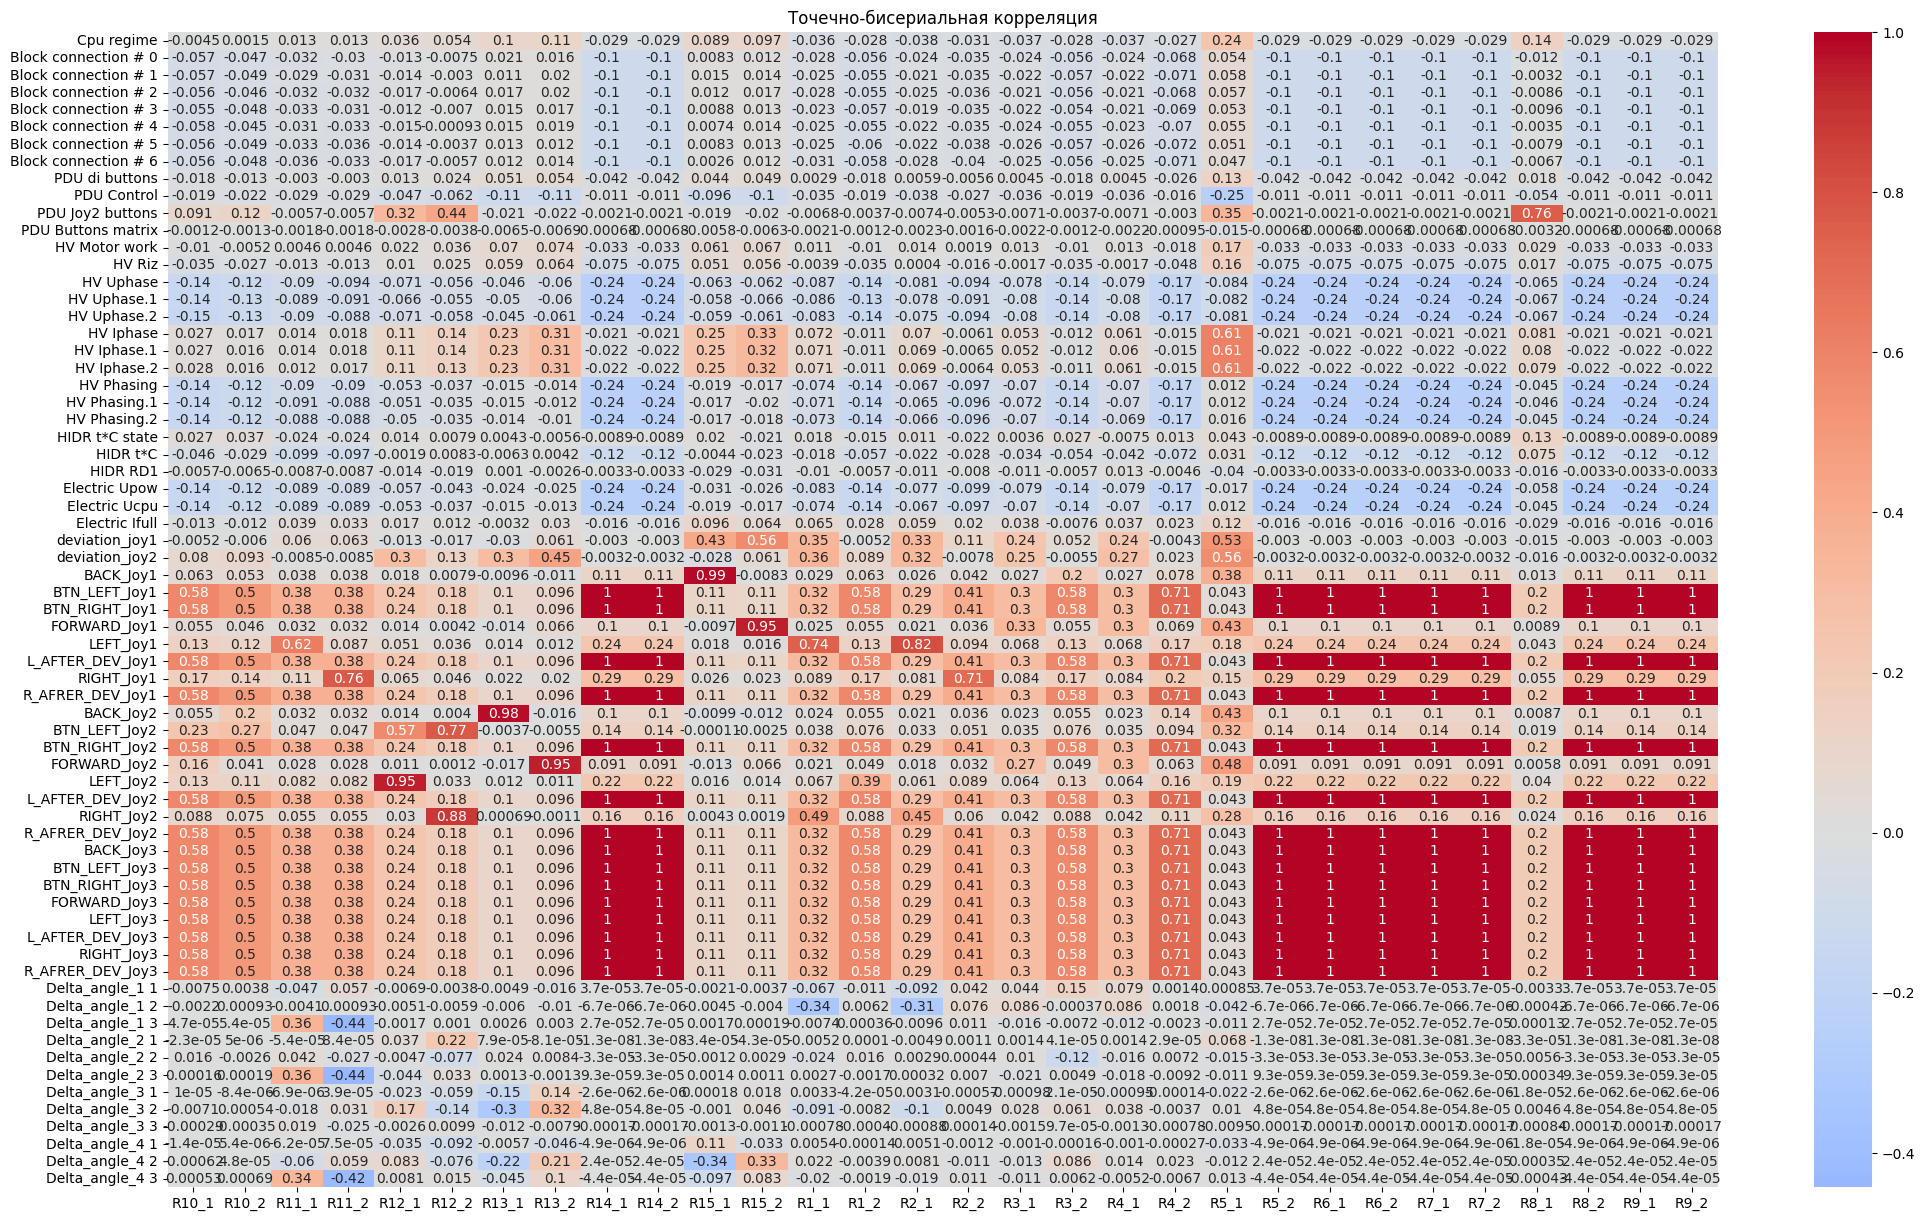

In [33]:
plt.figure(figsize=(25, 15))
sns.heatmap(pbs_corrs.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title("Точечно-бисериальная корреляция")
plt.show()

In [40]:
sl = {}

for i in range(1, 16):
    for j in range(1, 3):
        sl[f'R{i}_{j}'] = len(pbs_corrs[np.abs(pbs_corrs[f'R{i}_{j}']) > 0.3])

In [47]:
sorted(sl.items(), key=lambda x: -x[1])

[('R1_1', 20),
 ('R11_1', 19),
 ('R11_2', 19),
 ('R4_1', 17),
 ('R1_2', 16),
 ('R2_2', 16),
 ('R3_1', 16),
 ('R3_2', 15),
 ('R4_2', 15),
 ('R5_2', 15),
 ('R6_1', 15),
 ('R6_2', 15),
 ('R7_1', 15),
 ('R7_2', 15),
 ('R8_2', 15),
 ('R9_1', 15),
 ('R9_2', 15),
 ('R10_1', 15),
 ('R10_2', 15),
 ('R14_1', 15),
 ('R14_2', 15),
 ('R5_1', 11),
 ('R13_2', 6),
 ('R15_2', 6),
 ('R2_1', 5),
 ('R12_1', 4),
 ('R12_2', 3),
 ('R15_1', 3),
 ('R13_1', 2),
 ('R8_1', 1)]

Mutual information

In [34]:
from sklearn.feature_selection import mutual_info_classif
from tqdm import tqdm

mi_scores = pd.DataFrame(index=feature_columns, columns=target_columns)

X = data_1[feature_columns]

for y_col in tqdm(target_columns):
    scores = mutual_info_classif(X, data_1[y_col], random_state=42)
    mi_scores[y_col] = scores

100%|██████████| 30/30 [00:41<00:00,  1.38s/it]


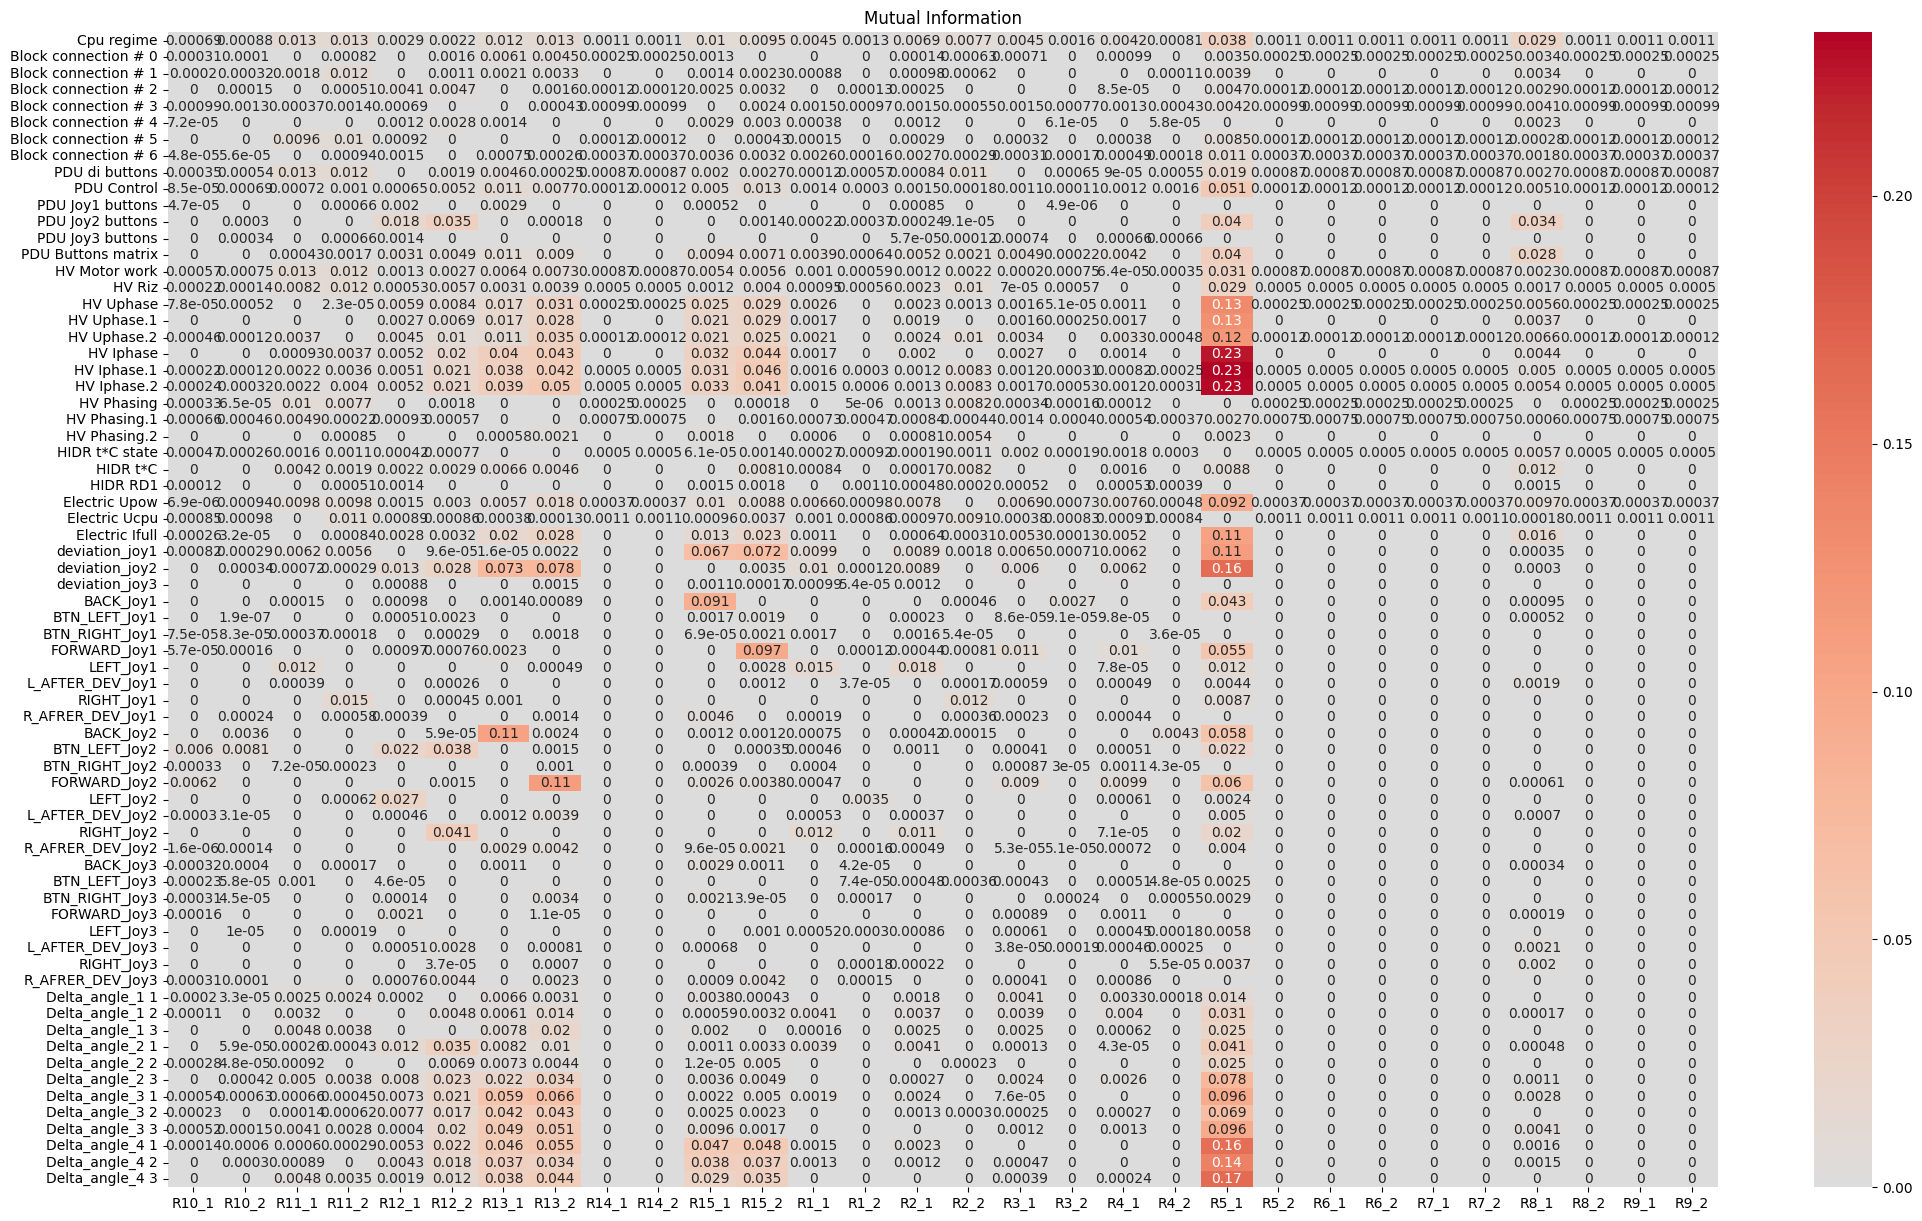

In [35]:
plt.figure(figsize=(25, 15))
sns.heatmap(mi_scores.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title("Mutual Information")
plt.show()

# ОТБОР ФИЧ (CATBOOST)

In [36]:
from catboost import MultiTargetCustomMetric

class CustomMultiLabelMetric(MultiTargetCustomMetric):
    def __init__(self):
        self._name = 'CustomF1'
        
        self._greater_is_better = True

    def evaluate(self, approxes, targets, weights):
        preds = [np.array(a > 0.5, dtype=int) for a in approxes]
        targets = [np.array(t, dtype=int) for t in targets]
        
        f1_scores = []
        for pred, target in zip(preds, targets):
            tp = np.sum((pred == 1) & (target == 1))
            fp = np.sum((pred == 1) & (target == 0))
            fn = np.sum((pred == 0) & (target == 1))
            
            precision = tp / (tp + fp + 1e-9)
            recall = tp / (tp + fn + 1e-9)
            f1 = 2 * (precision * recall) / (precision + recall + 1e-9)
            f1_scores.append(f1)
        
        return np.mean(f1_scores), len(targets[0])

    def is_max_optimal(self):
        return self._greater_is_better

    def get_final_error(self, error, weight):
        return error


In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import f1_score

X = data_1[feature_columns]
y = data_1[target_columns]

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=1e-2,
    depth=6,
    verbose=0,
    loss_function='MultiLogloss',
    eval_metric=CustomMultiLabelMetric(),
)

In [38]:
%pip install ipywidgets ipython nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
selected_features = model.select_features(
    X,
    y,
    num_features_to_select=40,
    features_for_select=feature_columns,
    steps=5,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Step #1 out of 5


c:\Users\Artem\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:4519: UserWarning: Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function array>) found for signature:
 
 >>> array(array(bool, 1d, C), dtype=Function(<class 'int'>))
 
There are 2 candidate implementations:
   - Of which 2 did not match due to:
   Overload in function 'impl_np_array': File: numba\np\arrayobj.py: Line 5432.
     With argument(s): '(array(bool, 1d, C), dtype=Function(<class 'int'>))':
    Rejected as the implementation raised a specific error:
      TypingError: The argument "dtype" must be a data-type if it is provided
  raised from c:\Users\Artem\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\np\arrayobj.py:5440

During: resolving callee type: Function(<built-in function array>)
During: typing of call at C:\Users\Artem\AppData\Local\Temp\ipyker

Feature #12 eliminated
Feature #9 eliminated
Feature #10 eliminated
Feature #14 eliminated
Feature #33 eliminated
Feature #27 eliminated
Feature #51 eliminated
Step #2 out of 5
Feature #52 eliminated
Feature #55 eliminated
Feature #57 eliminated
Feature #22 eliminated
Feature #56 eliminated
Feature #8 eliminated
Feature #15 eliminated
Step #3 out of 5
Feature #25 eliminated
Feature #49 eliminated
Feature #44 eliminated
Feature #23 eliminated
Feature #54 eliminated
Feature #35 eliminated
Step #4 out of 5
Feature #69 eliminated
Feature #4 eliminated
Feature #59 eliminated
Feature #36 eliminated
Feature #60 eliminated
Step #5 out of 5
Feature #65 eliminated
Feature #39 eliminated
Feature #3 eliminated
Feature #66 eliminated
Feature #61 eliminated
Train final model


In [ ]:
import logging

logger = logging.getLogger(__name__)
logging.basicConfig(filename='main.log', level=logging.INFO)

logger.log(logging.INFO, selected_features['selected_features_names'])

In [70]:
model2 = CatBoostClassifier(
    iterations=1000,
    learning_rate=1e-2,
    depth=6,
    verbose=0,
    loss_function='MultiLogloss',
    eval_metric=CustomMultiLabelMetric(),
)

selected_features2 = model2.select_features(
    X,
    y,
    num_features_to_select=30,
    features_for_select=feature_columns,
    steps=10,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Step #1 out of 10


c:\Users\Artem\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:4519: UserWarning:

Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function array>) found for signature:
 
 >>> array(array(bool, 1d, C), dtype=Function(<class 'int'>))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload in function 'impl_np_array': File: numba\np\arrayobj.py: Line 5432.
        With argument(s): '(array(bool, 1d, C), dtype=Function(<class 'int'>))':
       Rejected as the implementation raised a specific error:
         TypingError: The argument "dtype" must be a data-type if it is provided
  raised from c:\Users\Artem\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\np\arrayobj.py:5440

During: resolving callee type: Function(<built-in function array>)
During: typing of call at C:\Users\Artem\AppData\L

Feature #12 eliminated
Feature #9 eliminated
Feature #10 eliminated
Feature #14 eliminated
Feature #33 eliminated
Feature #27 eliminated
Step #2 out of 10
Feature #59 eliminated
Feature #22 eliminated
Feature #44 eliminated
Feature #52 eliminated
Feature #56 eliminated
Step #3 out of 10
Feature #25 eliminated
Feature #49 eliminated
Feature #35 eliminated
Feature #69 eliminated
Feature #36 eliminated
Step #4 out of 10
Feature #29 eliminated
Feature #8 eliminated
Feature #66 eliminated
Feature #57 eliminated
Step #5 out of 10
Feature #15 eliminated
Feature #50 eliminated
Feature #61 eliminated
Feature #54 eliminated
Step #6 out of 10
Feature #24 eliminated
Feature #55 eliminated
Feature #47 eliminated
Feature #7 eliminated
Step #7 out of 10
Feature #65 eliminated
Feature #23 eliminated
Feature #4 eliminated
Step #8 out of 10
Feature #60 eliminated
Feature #16 eliminated
Feature #3 eliminated
Step #9 out of 10
Feature #18 eliminated
Feature #39 eliminated
Feature #30 eliminated
Step #10 o

In [72]:
logger.log(logging.INFO, selected_features2['selected_features_names'])

In [ ]:
from sklearn.model_selection import train_test_split

X = data_1[selected_features['selected_features_names']]
y = np.array(data_1[target_columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

model_final = CatBoostClassifier(
    iterations=5000,
    learning_rate=1e-3,
    depth=9,
    verbose=100,
    loss_function='MultiLogloss',
    eval_metric=CustomMultiLabelMetric()
)

model_final.fit(X_train, y_train, eval_set=(X_test, y_test))

c:\Users\Artem\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1790: UserWarning:

Failed to optimize method "evaluate" in the passed object:
Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function array>) found for signature:
 
 >>> array(array(bool, 1d, C), dtype=Function(<class 'int'>))
 
There are 2 candidate implementations:
      - Of which 2 did not match due to:
      Overload in function 'impl_np_array': File: numba\np\arrayobj.py: Line 5432.
        With argument(s): '(array(bool, 1d, C), dtype=Function(<class 'int'>))':
       Rejected as the implementation raised a specific error:
         TypingError: The argument "dtype" must be a data-type if it is provided
  raised from c:\Users\Artem\AppData\Local\Programs\Python\Python310\lib\site-packages\numba\np\arrayobj.py:5440

During: resolving callee type: Function(<built-in function array>)
During: typing of call at C:\Users\Artem\AppData\L

0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 304ms	remaining: 25m 17s
100:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 17.3s	remaining: 13m 57s
200:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 34.9s	remaining: 13m 52s
300:	learn: 0.0214027	test: 0.0186544	best: 0.0186544 (300)	total: 52.2s	remaining: 13m 35s
400:	learn: 0.0289331	test: 0.0237705	best: 0.0237705 (398)	total: 1m 9s	remaining: 13m 18s
500:	learn: 0.0439723	test: 0.0328246	best: 0.0328246 (500)	total: 1m 28s	remaining: 13m 14s


In [ ]:
pred_proba = model_final.predict_proba(X_test)

approxes = [pred_proba[:, i] for i in range(pred_proba.shape[1])]

CustomMultiLabelMetric().evaluate(approxes, [y_test[col] for col in y_test.columns], len(X_test))

ValueError: operands could not be broadcast together with shapes (805,) (30,) 

In [ ]:
data_2

,Cpu regime,Block connection # 0,Block connection # 1,Block connection # 2,Block connection # 3,Block connection # 4,Block connection # 5,Block connection # 6,PDU di buttons,PDU Control,...,Delta_angle_1 3,Delta_angle_2 1,Delta_angle_2 2,Delta_angle_2 3,Delta_angle_3 1,Delta_angle_3 2,Delta_angle_3 3,Delta_angle_4 1,Delta_angle_4 2,Delta_angle_4 3
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,0.00,0.00,0.00,0.00,0.98,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9045,1.0,0.99,0.98,0.98,0.97,0.98,0.99,1.00,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9046,1.0,0.99,0.98,0.98,0.97,0.98,0.98,0.97,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9047,1.0,0.97,0.97,1.00,1.00,0.99,0.98,0.97,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9048,1.0,0.97,0.97,1.00,1.00,0.99,0.98,0.97,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
